## SVM
- kernel tricks
- hyperparameter & tunning
- Permuutation testing

### support vector machine (SVM) 이란?
- 처음에는 두개 분류밖에 되지 않았지만 현재는 멀티 클래스 분류 가능
- non-linear classification 기법이다.
- 현재도 활발하게 많이 사용되는 기법이다.

- 두개의 클래스를 나눠주는 선을 그려주는 것.
- 두개의 클래스에서 가장 가까운 point (서포트벡터) 끼리의 거리를 margin이라고 한다.
- Optimal hyperplane


### 노이즈가 있을 경우 어떻게 처리를 해줄것인가?
- SVM 모델은 Non-linear하게 사용할 수 있다.

- 다항식 Polynomial
    - 2D -> 3D로 변환해서 Optimal hyperplane을 그어준다.
- Gaussian
    - 정상 / 비정상 문제 경우 가우시안 커널을 사용 -> Decision surface

### hyperparameter
- Margin의 폭을 조정하거나 커널의 기능을 조정하는데 사용하는 파라미터
- RBF
- Cost : 샘플들이 다른 클래스에 놓이는 정도를 허용
    - 얼마나 빡빡하게 클래스를 나눌것인가
    - 노이즈를 얼마나 허용하는가?
    - C (cost)값이 낮은 경우 : 노이즈가 굉장히 많을 경우
    - C (cost)값이 높은 경우 : 노이즈가 적을 경우
- Gamma
- GridsearchCV
    - hyperparameter의 범위를 정해서 넣어주면 모든 경우의 수를 대입해서 가장 높은 정확도를 높이는 하이퍼파라미터의 값을 선택해주는 함수
    - 범위는 개발자가 임의로 설정
- 데이터 피쳐가 적을경우 하이퍼파라미터를 강하게 잡을 경우 overfitting이 발생할 수 있다.

### Permutation testing
- 통계집단은 집단별로 다른 경우의 유의미성을 구하는 것 (인과관계)
- 가정 : 데이터가 정규성이 있어야한다.
- 통계 이슈 : 통계 테스트의 가정이 맞지 않을때
- (이론적인 가정) x와 y가 랜덤하게 매칭이 되었을때 만번을 테스트해본 경우 chance level만큼 나올것이다.


In [1]:
## Data: 2023-06-19

import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.inspection import DecisionBoundaryDisplay

# Import data
iris = datasets.load_iris()
# Take the first two features
X = iris.data[:, :2]
y = iris.target

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


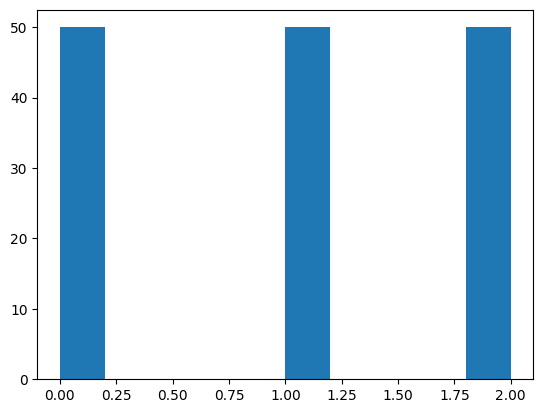

In [2]:
# Data: SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm
# Target: 3 Species
# Show data distribution
print(y)
plt.figure()
plt.hist(y)
plt.show()

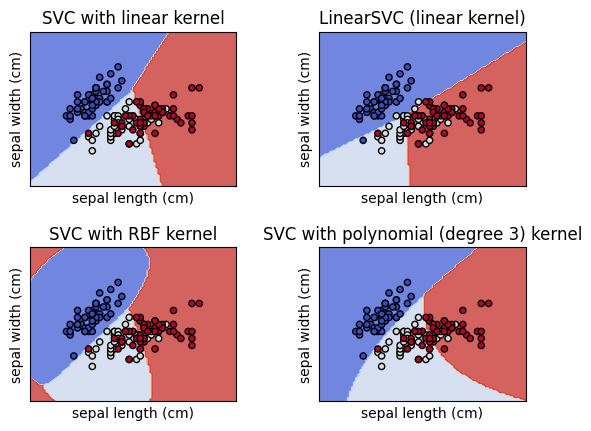

<bound method ClassifierMixin.score of SVC(C=0.1, gamma='auto', kernel='poly')>


In [3]:
## Plotting SVM classifier distribution
C = 0.1  # SVM regularization parameter
models = (
    svm.SVC(kernel="linear", C=C),
    svm.LinearSVC(C=C, max_iter=10000),
    svm.SVC(kernel="rbf", gamma=0.7, C=C),
    svm.SVC(kernel="poly", degree=3, gamma="auto", C=C),
)
models = (clf.fit(X, y) for clf in models)

# Titles
titles = (
    "SVC with linear kernel",
    "LinearSVC (linear kernel)",
    "SVC with RBF kernel",
    "SVC with polynomial (degree 3) kernel",
)

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]

for clf, title, ax in zip(models, titles, sub.flatten()):
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.8,
        ax=ax,
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],
    )
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()
print(clf.score)

In [4]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler
import numpy as np
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import LeaveOneOut, cross_val_score, KFold
from sklearn.model_selection import StratifiedShuffleSplit,permutation_test_score, ShuffleSplit, \
    cross_val_predict, StratifiedKFold, GridSearchCV
import time

# minmaxScaler
MMS=MinMaxScaler().fit(X)
X_Scaled = MMS.transform(X)

## SVM Hyperparameter tunning
## raw data
C_range = np.logspace(-10, 4, 100)
gamma_range = np.logspace(-10, 4, 100)
#     weights = np.linspace(0.001, 0.999, 5) # when permutation distribution is not normal distributed, this fine-grained custom class weighs are used
#     param_grid = dict(gamma=gamma_range, C=C_range, class_weight=[{0: x, 1: 1.0 - x} for x in weights])
param_grid = dict(gamma=gamma_range, C=C_range)

#cv = StratifiedShuffleSplit(n_splits=no_Fold, test_size=0.025, random_state=42) # Leave % Out
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)  # Leave n Out
#cv = StratifiedShuffleSplit(n_splits=10, test_size=0.25, random_state=42) # 5Fold
#cv = KFold(n_splits = 10, shuffle=True, random_state=0) # KFold
grid = GridSearchCV(svm.SVC(kernel='rbf'), param_grid=param_grid, cv=cv, n_jobs=-1, verbose=1)
print("grid searching--------")
grid.fit(X_Scaled, y)
print("Hyperparameter tunned rbf_g: ", grid.best_params_, grid.best_score_)

#-- 성능이 높아도 std도 확인해봐야한다.
#-- std가 높은 경우 좋다고 할 수 있을까?

grid searching--------
Fitting 10 folds for each of 10000 candidates, totalling 100000 fits
Hyperparameter tunned rbf_g:  {'C': 2.91505306282517, 'gamma': 0.058570208180566734} 0.82


In [5]:
## Non-hyperparameter tunned SVM
C_range = [0.1]
gamma_range = [0.7]
param_grid = dict(C=C_range,gamma=gamma_range)
grid = GridSearchCV(svm.SVC(kernel='rbf'), param_grid=param_grid, cv=cv, n_jobs=-1, verbose=0)
print("grid searching--------")
grid.fit(X_Scaled, y)
print("Non-hyperparamete tunned rbf_g: ", grid.best_params_, grid.best_score_)

grid searching--------
Non-hyperparamete tunned rbf_g:  {'C': 0.1, 'gamma': 0.7} 0.7733333333333333


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 122 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 722 tasks      | elapsed:   18.9s
[Parallel(n_jobs=-1)]: Done 1722 tasks      | elapsed:   44.9s
[Parallel(n_jobs=-1)]: Done 3122 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 4922 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 7122 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 9722 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 10000 out of 10000 | elapsed:  4.4min finished


RBF Classification score 0.7733333333333333 (pvalue : 9.999000099990002e-05)


Text(0.5, 1.0, 'Permutation result')

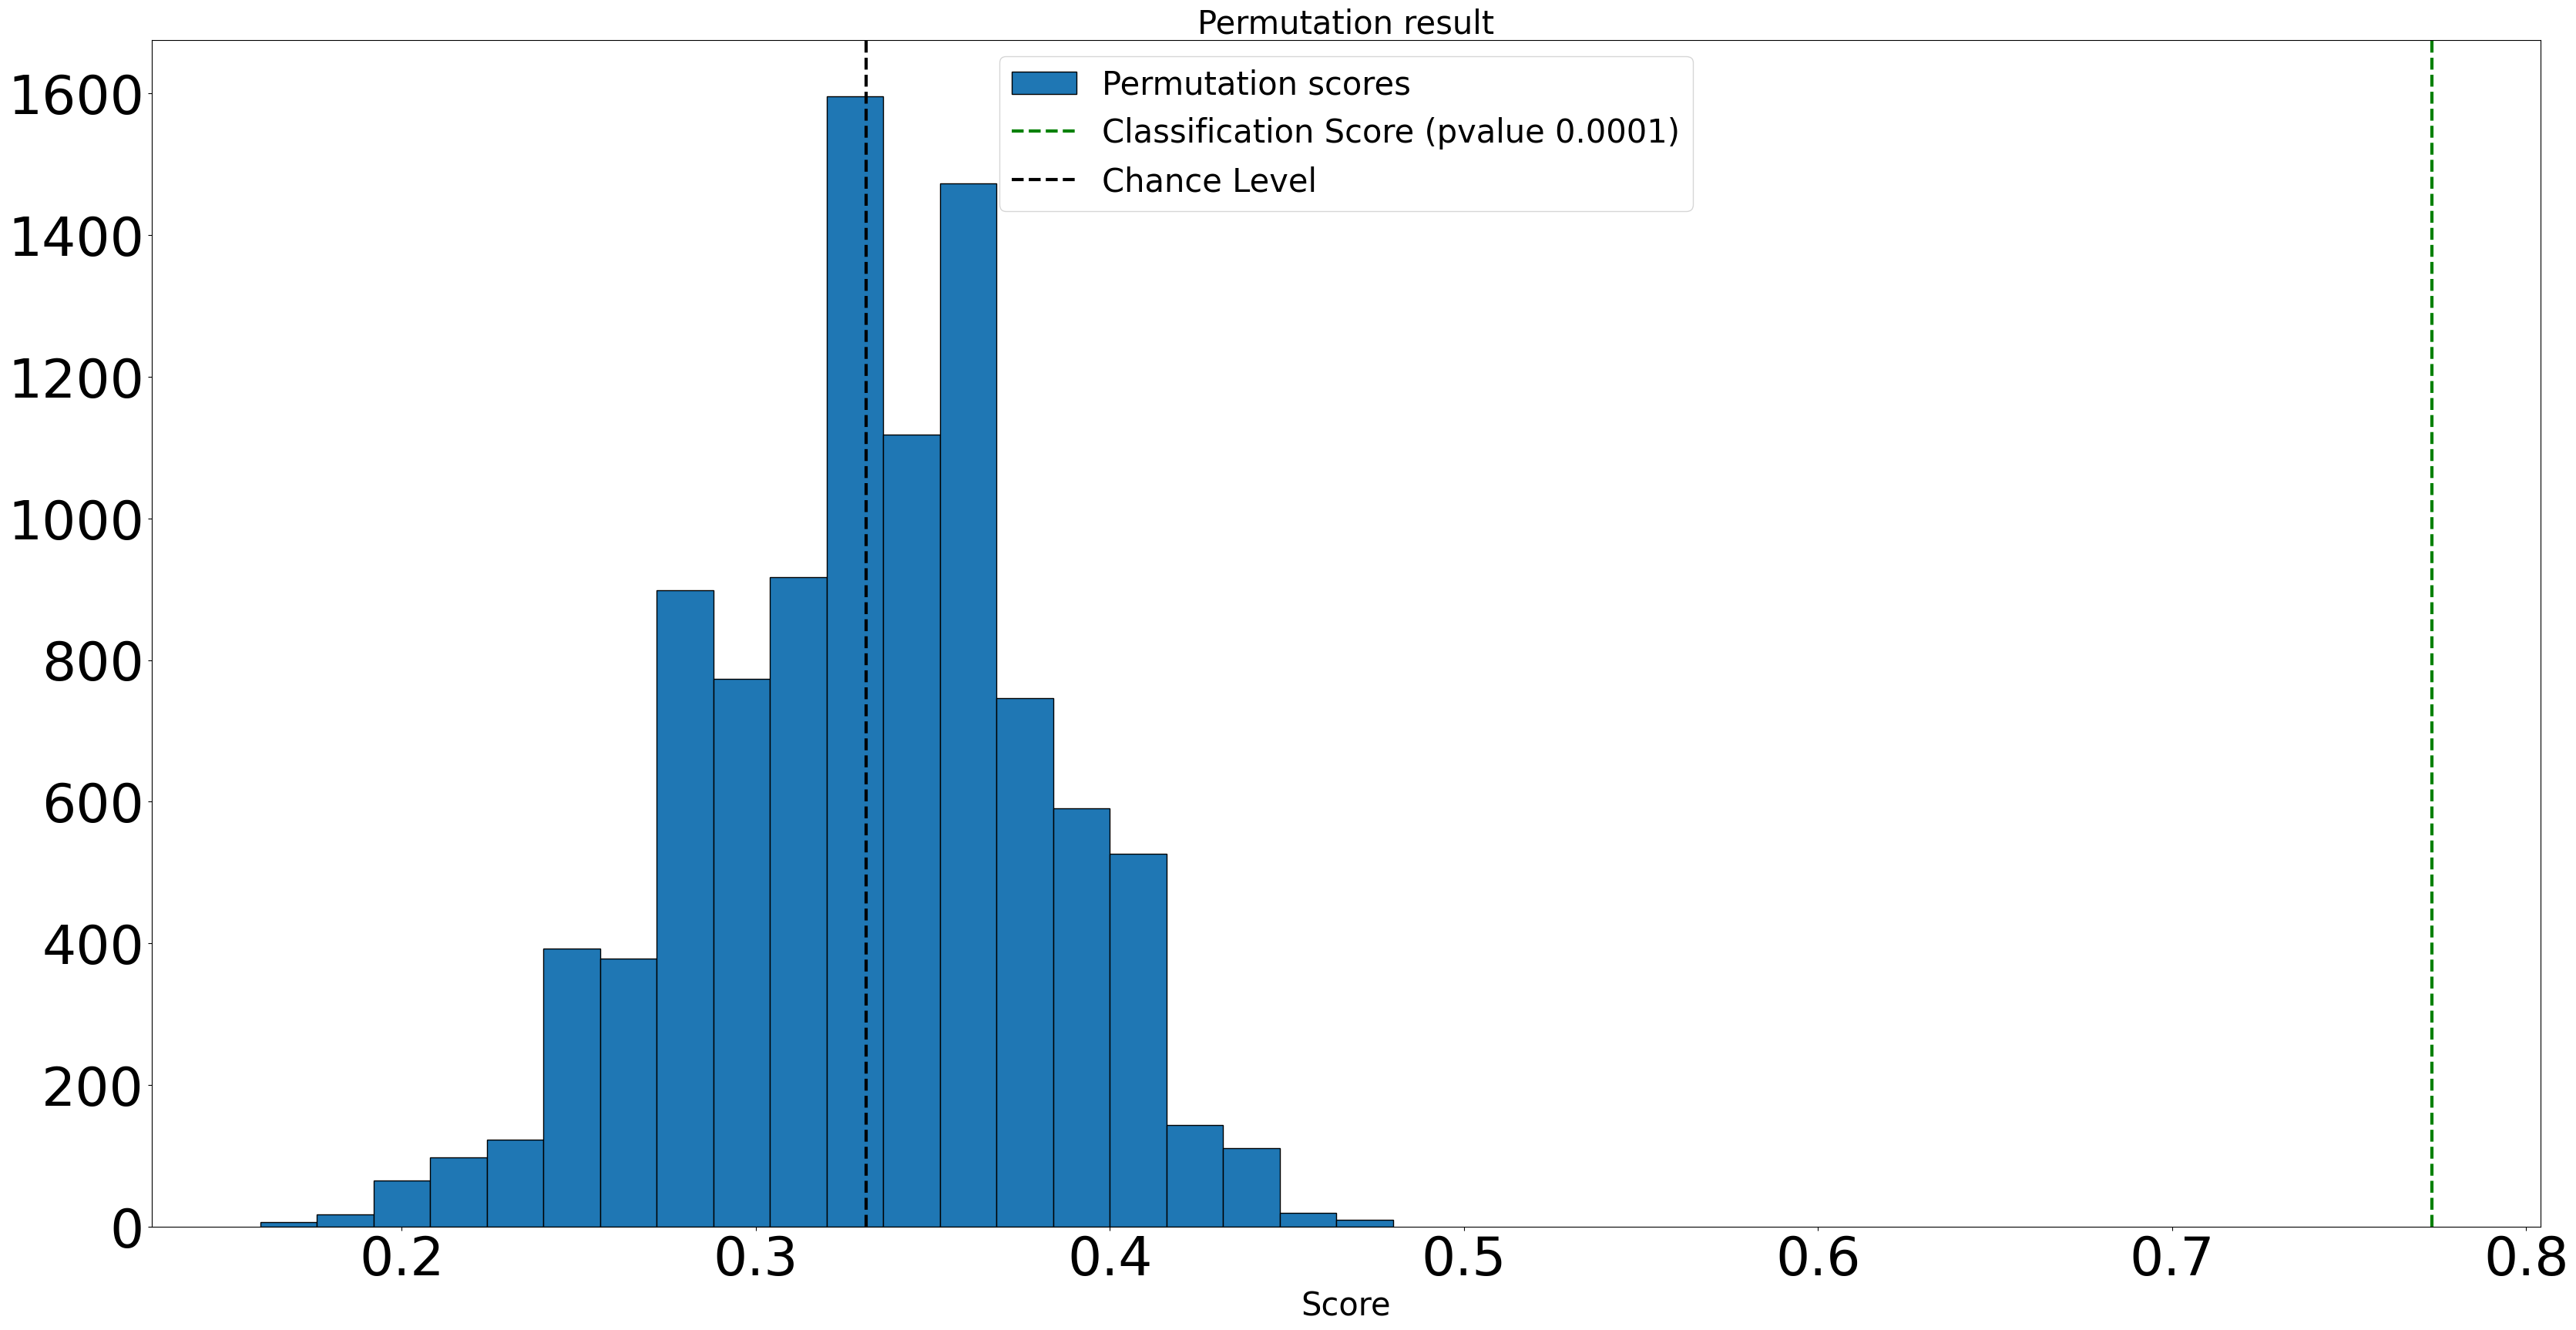

In [7]:
## Permutation setting
svc_rbf = svm.SVC(kernel='rbf', gamma=grid.best_params_["gamma"], C=grid.best_params_["C"])
score, permutation_scores, pvalue = permutation_test_score(svc_rbf, X_Scaled, y, cv=cv, n_permutations=10000, n_jobs=-1, verbose=1)
time.sleep(1)
print("RBF Classification score %s (pvalue : %s)" % (score, pvalue))

# # #############################################################################
# # View histogram of permutation scores
plt.rc('font', size=50)
plt.hist(permutation_scores, bins=20, label='Permutation scores', edgecolor='black')
ylim = plt.ylim()
plt.plot(2 * [score], ylim, '--g', linewidth=3, label='Classification Score'' (pvalue %.4f)' % pvalue)
plt.plot(2 * [np.mean(permutation_scores)], ylim, '--k', linewidth=3, label='Chance Level')
plt.rcParams["figure.figsize"] = [40, 20]
plt.ylim(ylim)
plt.legend(fontsize=30)
plt.xlabel('Score', fontsize = 30)
plt.title("Permutation result", fontsize=30)

range(0, 6)


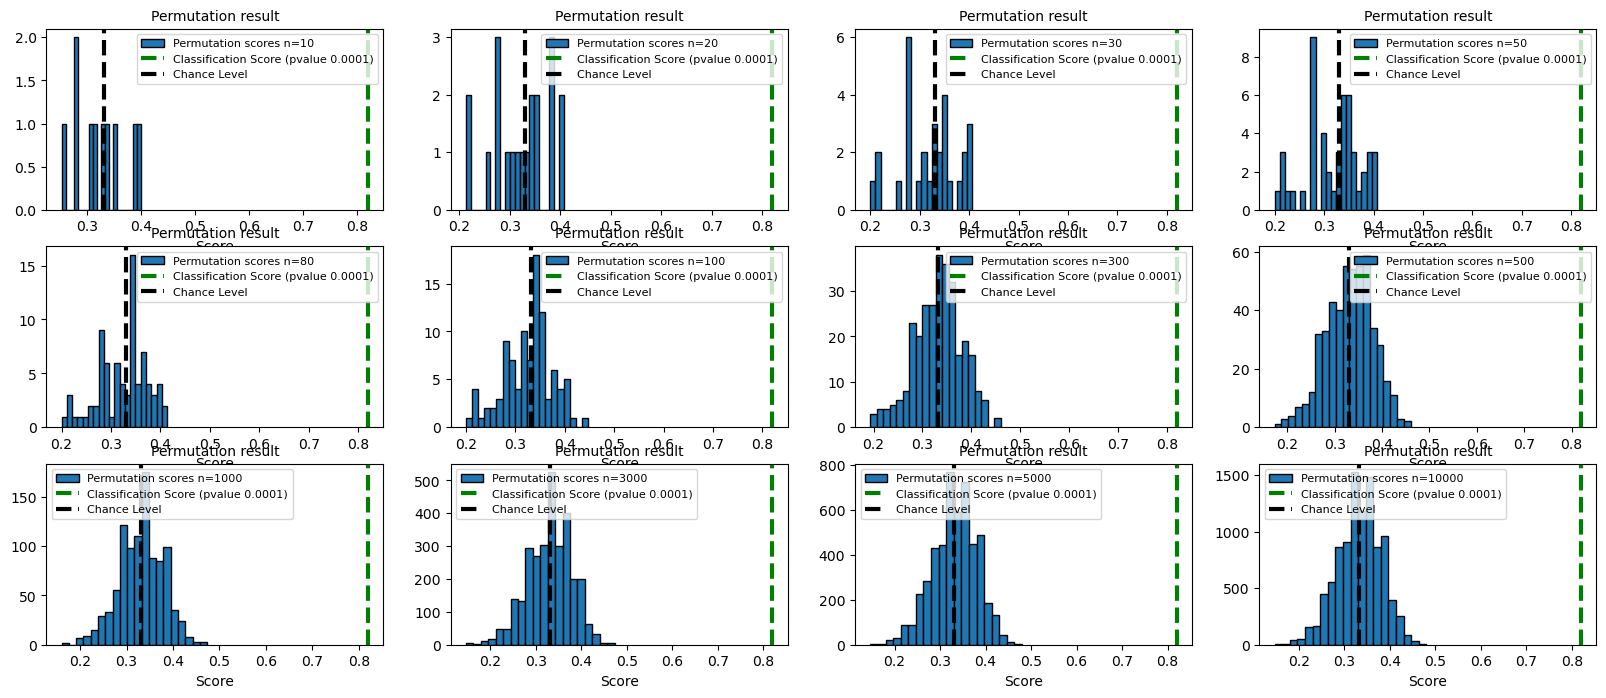

In [ ]:
# # #############################################################################
# # View histogram of permutation scores

i = [10, 20, 30, 50, 80,100,300,500,1000,3000,5000,10000]
plt.figure()
print(range(6))
for k in range(len(i)):
    plt.subplot(3,4,k+1)
    plt.rc('font', size=10)
    plt.xlabel('Score', fontsize = 10)
    plt.title("Permutation result", fontsize=10)
    plt.rcParams["figure.figsize"] = [20, 8]
    plt.hist(permutation_scores[:i[k]], bins=20, label='Permutation scores n='+str(i[k]), edgecolor='black')
    ylim = plt.ylim()
    plt.plot(2 * [score], ylim, '--g', linewidth=3, label='Classification Score'' (pvalue %.4f)' % pvalue)
    plt.plot(2 * [np.mean(permutation_scores)], ylim, '--k', linewidth=3, label='Chance Level')
    plt.ylim(ylim)
    plt.legend(fontsize=8)

plt.show()